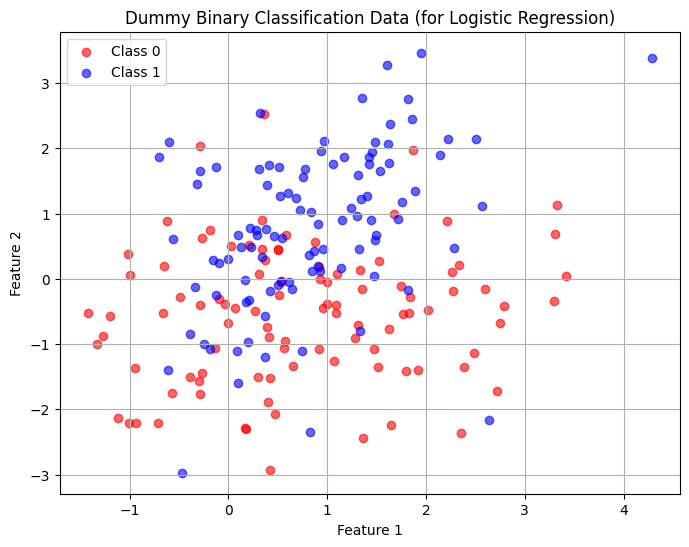

Features shape: (200, 2)
Target shape: (200, 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set seed
np.random.seed(42)

# Generate a classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,          # Only 2 useful features for visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,         # Low separation makes it harder
    flip_y=0.1,            # Add noise (10% label flipping)
    random_state=42
)
x1 = X[y == 0][:, 0]
x2 = X[y == 0][:, 1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

y = y.reshape(-1,1)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

In [2]:
np.random.seed(0)

In [ ]:
#normalizing 
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean)/std

In [ ]:
#activation functions
def sigmoid(Z, grad):
    s = 1/(1+np.exp(-Z))
    if grad:
        return s * (1 - s)
    else:
        return s
def relu(Z, grad):
    if grad:
        return (Z > 0).astype(float)
    else:
        return np.maximum(0, Z)

In [ ]:
#neural network architecture
arch = [50, 50, 50, 50, 1]
activations = [relu, relu, sigmoid, sigmoid, sigmoid]

#list for weights and biases
W = []
B = []
lr = 0.01  #learning rate

m = X.shape[0]  #number of samples

# Weight and Bias Initialization
for i in range(len(arch)):
    if i==0:
        w = np.random.randn(X.shape[1],arch[i])
    else:
        w = np.random.randn(arch[i-1],arch[i])
    b = np.zeros((1,arch[i]))

    W.append(w)
    B.append(b)


In [ ]:
all_costs = []

# Training Loop
for _ in range(50000):
    A = X

    all_Z = []
    all_A = []

 # Forward Propagation
    for i in range(len(W)):
        Z = A @ W[i] + B[i]
        A = activations[i](Z, grad=False)

        all_Z.append(Z)
        all_A.append(A)

    cost = (-1 / m) * np.sum((y * np.log(A) + (1 - y) * np.log(1 - A)))   # Compute Cost (Binary Cross-Entropy Loss)
    all_costs.append(cost)

# Backward Propagation
    for i in range(len(W)-1, -1, -1):
        if i == len(W) - 1:  # Last layer
            dZ = all_A[i] - y  # shape: (m, output_size)
        else:
            dZ = (dZ @ W[i+1].T) * activations[i](all_Z[i], grad=True)  # element-wise
        
        # Compute gradient of weights
        if i == 0:
            dW = X.T @ dZ
        else:
            dW = all_A[i-1].T @ dZ  # matrix multiplication

# Gradient descent update
        W[i] = W[i] - (lr / m) * dW
        B[i] = B[i] - (lr / m) * np.sum(dZ, keepdims=True, axis=0)

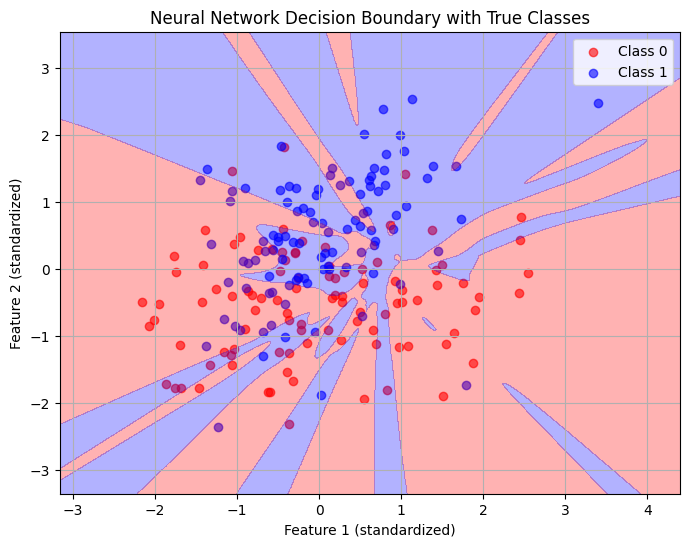

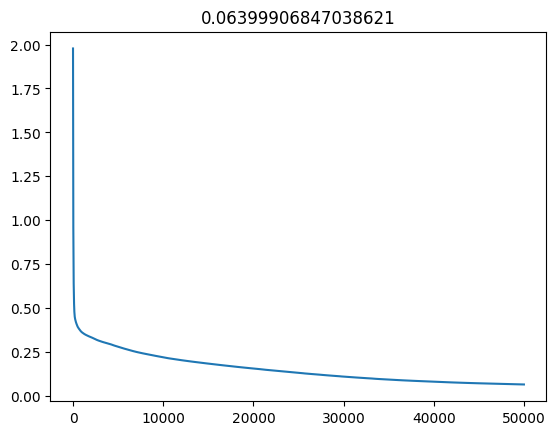

In [7]:
# 1. Plot the original data using true labels
plt.figure(figsize=(8, 6))
y = y.flatten()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)

# 2. Create a meshgrid over the feature space
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1_vals = np.linspace(x1_min, x1_max, 300)
x2_vals = np.linspace(x2_min, x2_max, 300)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 3. Flatten and prepare grid input
x1_flat = X1.ravel().reshape(-1, 1)
x2_flat = X2.ravel().reshape(-1, 1)
X_grid = np.hstack((x1_flat, x2_flat))

# 4. Standardize grid input (same as training)
X_grid = (X_grid - mean) / std

# 5. Run forward pass through the trained NN on the grid
A = X_grid
for i in range(len(W)):
    Z = A @ W[i] + B[i]
    A = activations[i](Z, grad=False)
y_grid_pred = A.reshape(X1.shape)

# 6. Plot the decision boundary
#plt.contour(X1, X2, y_grid_pred, levels=[0.5], colors='black')
plt.contourf(X1, X2, y_grid_pred, levels=[0, 0.5, 1], alpha=0.3, colors=["red", "blue"])

# 7. Plot formatting
plt.title("Neural Network Decision Boundary with True Classes")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.legend()
plt.grid(True)
plt.show()

plt.title(str(cost))
plt.plot(all_costs)
plt.show()